In [ ]:
import cv2
import numpy as np

def encrypt_image(image_path, key):
    # Load image
    img = cv2.imread(image_path)

    # Convert key to integer (assume a simple integer key here)
    key = int(key)

    # XOR operation on each pixel
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):  # For color images
                img[i, j, k] = img[i, j, k] ^ key

    # Save encrypted image
    cv2.imwrite('encrypted_image.jpg', img)

def decrypt_image(encrypted_image_path, key):
    # Load encrypted image
    img = cv2.imread(encrypted_image_path)

    # Convert key to integer
    key = int(key)

    # Reverse XOR operation
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):  # For color images
                img[i, j, k] = img[i, j, k] ^ key

    # Save decrypted image
    cv2.imwrite('decrypted_image.jpg', img)

# --- Usage Example ---
image_path = 'c130.jpg' 
secret_key = 123  # Choose a more complex key in production

encrypt_image(image_path, secret_key)
decrypt_image('encrypted_image.jpg', secret_key)

# --- Visualization ---
original = cv2.imread(image_path)
encrypted = cv2.imread('encrypted_image.jpg')
decrypted = cv2.imread('decrypted_image.jpg')

cv2.imshow('Original', original)
cv2.imshow('Encrypted', encrypted)
cv2.imshow('Decrypted', decrypted)
cv2.waitKey(0)
cv2.destroyAllWindows()


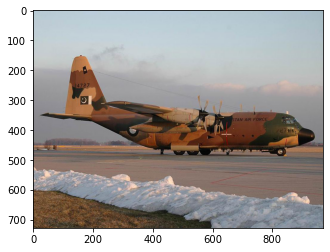

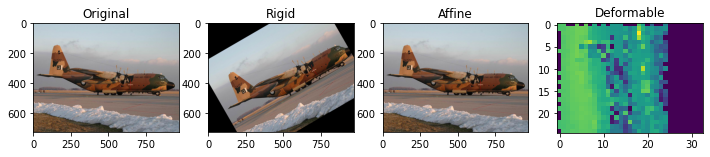

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import shift, rotate, map_coordinates

def load_and_display_image(image_path):
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.show()

def rigid_transformation(img, translation, angle):
    # Translation
    tx, ty = translation
    shifted_img = shift(img, shift=(ty, tx, 0), mode='constant') 

    # Rotation
    rotated_img = rotate(shifted_img, angle, reshape=False,  mode='constant')

    return rotated_img

def affine_transformation(img, matrix):
    # Construct affine transformation matrix 
    transform_matrix = np.vstack([matrix, [0, 0, 1]]) 

    # Apply transformation
    transformed_img = map_coordinates(img, transform_matrix, order=1, mode='constant')

    # Check validity and return a properly dimensioned array
    if transformed_img.ndim == 2:  # Handle grayscale images
        return transformed_img
    elif transformed_img.ndim == 3:  # Handle color images
        return transformed_img
    else:  # If dimensions are invalid, return the original image to avoid an error
        print("Warning: Transformation produced invalid dimensions")
        return img 


def simple_deformable_transformation(img, grid_size):
    # Create deformation grid
    x, y = np.mgrid[0:img.shape[0]:grid_size, 0:img.shape[1]:grid_size]
    
    # Add random offsets (simulating deformation)
    dx = np.random.randint(-10, 10, x.shape)
    dy = np.random.randint(-10, 10, y.shape)

    # Apply deformation
    transformed_img = map_coordinates(img, [y + dy, x + dx, np.zeros_like(x)], order=1, mode='constant')

    return transformed_img

# ----- Usage Example -----
image_path = 'c130.jpg'

# Load the original image
load_and_display_image(image_path)

# Transformations
rigid_img = rigid_transformation(plt.imread(image_path), (50, 20), 30)  # Translation + Rotation
affine_img = affine_transformation(plt.imread(image_path), [[0.8, 0.2, 0], [0, 1, 0]])  # Scaling + Shear
deformed_img = simple_deformable_transformation(plt.imread(image_path), grid_size=30)

# Display transformed images
plt.figure(figsize=(12, 4))
plt.subplot(141), plt.imshow(plt.imread(image_path)), plt.title('Original')
plt.subplot(142), plt.imshow(rigid_img), plt.title('Rigid')
plt.subplot(143), plt.imshow(affine_img), plt.title('Affine')
plt.subplot(144), plt.imshow(deformed_img), plt.title('Deformable')
plt.show()


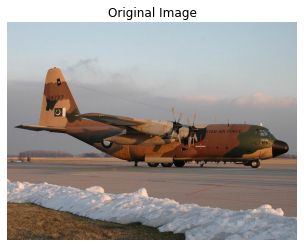

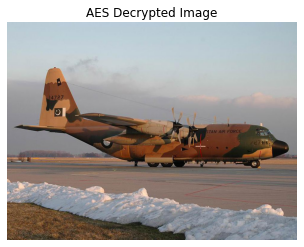

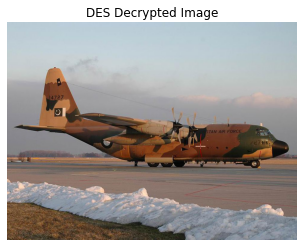

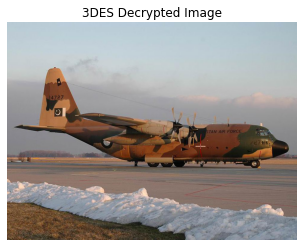

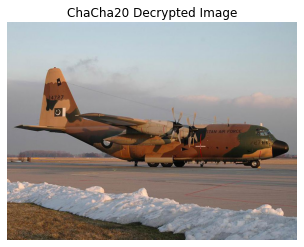

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 0: invalid continuation byte

<Figure size 720x144 with 1 Axes>

In [14]:
import matplotlib.pyplot as plt
from Crypto.Cipher import AES, DES, DES3, ChaCha20
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
from Crypto.Cipher import ARC4 as RC4  # RC4 is referred to as ARC4 in PyCryptodome

def load_and_display_image(image_path, title='Image'):
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Hide axes ticks
    plt.show()

def encrypt_decrypt_block_cipher(cipher_class, key, iv, data, block_size):
    # Create a new cipher object for encryption
    cipher_encrypt = cipher_class.new(key, cipher_class.MODE_CBC, iv)
    ciphertext = cipher_encrypt.encrypt(pad(data, block_size))

    # Create a new cipher object with the same key and IV for decryption
    cipher_decrypt = cipher_class.new(key, cipher_class.MODE_CBC, iv)
    decrypted_data = unpad(cipher_decrypt.decrypt(ciphertext), block_size)

    return ciphertext, decrypted_data


def encrypt_decrypt_stream_cipher(cipher, data):
    ciphertext = cipher.encrypt(data)
    decrypted_data = cipher.decrypt(ciphertext)
    return ciphertext, decrypted_data

def encrypt_decrypt_chacha20_cipher(key, nonce, data):
    cipher_encrypt = ChaCha20.new(key=key, nonce=nonce)
    ciphertext = cipher_encrypt.encrypt(data)

    cipher_decrypt = ChaCha20.new(key=key, nonce=nonce)
    decrypted_data = cipher_decrypt.decrypt(ciphertext)
    return ciphertext, decrypted_data

def plot_raw_data(data, title='Data'):
    plt.figure(figsize=(10, 2))
    plt.plot(data[:1024])  # Plot the first 1024 bytes for visibility
    plt.title(title)
    plt.xlabel('Byte Index')
    plt.ylabel('Byte Value')
    plt.show()





# Load the image and convert it to bytes for encryption
image_path = 'c130.jpg'
image_data = open(image_path, 'rb').read()
# Visualization
load_and_display_image(image_path, 'Original Image')
# AES Encryption and Decryption
key_aes = get_random_bytes(16)  # AES-128 uses a 16-byte key
iv_aes = get_random_bytes(16)   # Initialization vector for AES
_, decrypted_aes = encrypt_decrypt_block_cipher(AES, key_aes, iv_aes, image_data, AES.block_size)

# DES Encryption and Decryption
key_des = get_random_bytes(8)  # DES uses an 8-byte key
iv_des = get_random_bytes(8)   # Initialization vector for DES
_, decrypted_des = encrypt_decrypt_block_cipher(DES, key_des, iv_des, image_data, DES.block_size)

# 3DES Encryption and Decryption
key_3des = get_random_bytes(24)  # 3DES uses a 24-byte key
iv_3des = get_random_bytes(8)    # Initialization vector for 3DES
_, decrypted_3des = encrypt_decrypt_block_cipher(DES3, key_3des, iv_3des, image_data, DES3.block_size)

# ChaCha20 Encryption and Decryption
key_chacha20 = get_random_bytes(32)  # ChaCha20 can use a 32-byte key
nonce = get_random_bytes(12)  # Nonce for ChaCha20 should be 12 bytes
_, decrypted_chacha20 = encrypt_decrypt_chacha20_cipher(key_chacha20, nonce, image_data)

# RC4 Encryption and Decryption
key_rc4 = get_random_bytes(16)  # RC4 key can be variable; we'll use 16 bytes here
cipher_rc4 = RC4.new(key_rc4)
ciphertext_rc4, decrypted_rc4 = encrypt_decrypt_stream_cipher(cipher_rc4, image_data)


with open('decrypted_aes.jpg', 'wb') as f:
    f.write(decrypted_aes)
load_and_display_image('decrypted_aes.jpg', 'AES Decrypted Image')

with open('decrypted_des.jpg', 'wb') as f:
    f.write(decrypted_des)
load_and_display_image('decrypted_des.jpg', 'DES Decrypted Image')

with open('decrypted_3des.jpg', 'wb') as f:
    f.write(decrypted_3des)
load_and_display_image('decrypted_3des.jpg', '3DES Decrypted Image')

with open('decrypted_chacha20.jpg', 'wb') as f:
    f.write(decrypted_chacha20)
load_and_display_image('decrypted_chacha20.jpg', 'ChaCha20 Decrypted Image')

with open('decrypted_rc4.jpg', 'wb') as f:
    f.write(decrypted_rc4)
# Raw data visualization of decrypted RC4 data
plot_raw_data(decrypted_rc4, 'RC4 Decrypted Data Visualization')


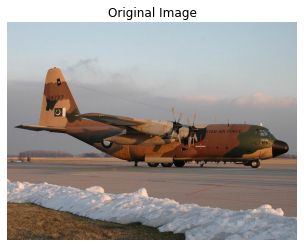

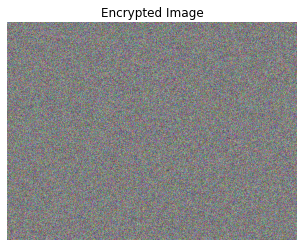

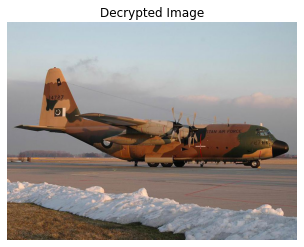

In [19]:
import matplotlib.pyplot as plt
from Crypto.Cipher import AES, DES, DES3
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
from PIL import Image

def load_and_display_image(image_path, title='Image'):
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Hide axis
    plt.show()

def image_to_bytes(image_path):
    with Image.open(image_path) as img:
        return img.tobytes(), img.size

def bytes_to_image(byte_data, image_path, size, mode='RGB'):
    with Image.frombytes(mode, size, byte_data) as img:
        img.save(image_path)

def encrypt_block_cipher(image_data, key, iv, cipher_name="AES"):
    if cipher_name == "AES":
        cipher = AES.new(key, AES.MODE_CBC, iv)
    elif cipher_name == "DES":
        cipher = DES.new(key, DES.MODE_CBC, iv)
    elif cipher_name == "3DES":
        cipher = DES3.new(key, DES3.MODE_CBC, iv)
    else:
        raise ValueError("Unsupported cipher")

    return cipher.encrypt(pad(image_data, cipher.block_size))

def decrypt_block_cipher(ciphertext, key, iv, cipher_name="AES"):
    if cipher_name == "AES":
        cipher = AES.new(key, AES.MODE_CBC, iv)
    elif cipher_name == "DES":
        cipher = DES.new(key, DES.MODE_CBC, iv)
    elif cipher_name == "3DES":
        cipher = DES3.new(key, DES3.MODE_CBC, iv)
    else:
        raise ValueError("Unsupported cipher")

    plaintext = unpad(cipher.decrypt(ciphertext), cipher.block_size)
    return plaintext

# Usage
image_path = 'c130.jpg'
load_and_display_image(image_path, 'Original Image')

key = get_random_bytes(16)  # For AES-128
iv = get_random_bytes(16)  # IV must also be 16 bytes long for AES

# Get image data and size
image_data, image_size = image_to_bytes(image_path)

# Encrypt and visualize encrypted image
aes_ciphertext = encrypt_block_cipher(image_data, key, iv)
encrypted_image_path = 'aes_encrypted.jpg'
bytes_to_image(aes_ciphertext, encrypted_image_path, image_size)
load_and_display_image(encrypted_image_path, 'Encrypted Image')

# Decrypt and visualize decrypted image
decrypted_data = decrypt_block_cipher(aes_ciphertext, key, iv)
decrypted_image_path = 'aes_decrypted.jpg'
bytes_to_image(decrypted_data, decrypted_image_path, image_size)
load_and_display_image(decrypted_image_path, 'Decrypted Image')
